## Modeling with Gurobipy

### Python Data Structures and Gurobipy Extended Data Structures

![PythonDataStructures](https://github.com/guilhermecadori/imagesRepo/blob/main/1.png?raw=true)


![ExtendedDataStructuresGurobipy](https://github.com/guilhermecadori/imagesRepo/blob/main/2.png?raw=true)


In [26]:
# Importing Gurobipy package
import gurobipy as gp
from gurobipy import GRB


In [27]:
data = gp.tupledict(
    [
        (('a', 'b', 'c'), 3),
        (('a', 'c', 'b'), 4),
        (('b', 'a', 'c'), 5),
        (('b', 'c', 'a'), 6),
        (('c', 'a', 'b'), 7),
        (('c', 'b', 'a'), 3)
    ]
)

print(f'Data: {data}')


Data: {('a', 'b', 'c'): 3, ('a', 'c', 'b'): 4, ('b', 'a', 'c'): 5, ('b', 'c', 'a'): 6, ('c', 'a', 'b'): 7, ('c', 'b', 'a'): 3}


In [28]:
print('\n Tuplelist:')
keys = data.keys()
print(f'\t Select: {keys.select("a", "*", "*")}')



 Tuplelist:
	 Select: <gurobi.tuplelist (2 tuples, 3 values each):
 ( a , b , c )
 ( a , c , b )
>


In [29]:
print('\nTupledict')
print(f'\tSelect   : {data.select("a", "*", "*")}')
print(f'\tSum      : {data.sum("*", "*", "*")}')
coeff = {("a", "c", "b"): 6, ("b", "c", "a"): -4}
print(f'\tProd     : {data.prod(coeff, "*", "c", "*")}')



Tupledict
	Select   : [3, 4]
	Sum      : 28.0
	Prod     : 0.0


In [30]:
arcs, capacity, cost = gp.multidict(
    {
        ('Detroit', 'Boston'): [100, 7],
        ('Detroit', 'New York'): [80, 5],
        ('Detroit', 'Seattle'): [120, 4],
        ('Denver', 'Boston'): [120, 8],
        ('Denver', 'New York'): [120, 11],
        ('Denver', 'Seattle'): [120, 4]
    }
)

print('\nMultidict')
print(f'tCapacity: {capacity}')
print('\n')
print(f'\tCost: {cost}')



Multidict
tCapacity: {('Detroit', 'Boston'): 100, ('Detroit', 'New York'): 80, ('Detroit', 'Seattle'): 120, ('Denver', 'Boston'): 120, ('Denver', 'New York'): 120, ('Denver', 'Seattle'): 120}


	Cost: {('Detroit', 'Boston'): 7, ('Detroit', 'New York'): 5, ('Detroit', 'Seattle'): 4, ('Denver', 'Boston'): 8, ('Denver', 'New York'): 11, ('Denver', 'Seattle'): 4}


### Environments

![GurobipyEnvironments](https://github.com/guilhermecadori/imagesRepo/blob/main/3.png?raw=true)


![GurobipyDefaultEnvironment](https://github.com/guilhermecadori/imagesRepo/blob/main/4.png?raw=true)


In [31]:
# Importing work libraries
import gurobipy as gp

# Building a model object within the default environment
# Using Python Context Manager
with gp.Model(name='model') as model: # Here the "env" argument was not used, thus the default config was used instead
    pass

# If not using Python Context Manager make sure to dispose the model and the environment once you are done optimizing
model = gp.Model(name='model')
model.dispose()
gp.disposeDefaultEnv()


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27
Freeing default Gurobi environment


In [32]:
# Building a model object using a new environment using Python Context Manager
with gp.Env() as env, gp.Model(name='model', env=env) as model:
    pass

# Alternative not using Python Context Manager
env = gp.Env()
model = gp.Model(name='model', env=env)
model.dispose()
env.dispose()


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27


### Decision Variables

![DecisionVarsGurobipy](https://github.com/guilhermecadori/imagesRepo/blob/main/5.png?raw=true)


In [35]:
import gurobipy as gp
from gurobipy import GRB

with gp.Model(name='model') as model:
    # Defining a binary decision variable
    x = model.addVar(vtype=GRB.BINARY, name='x')
    # Defining a integer decision variable with lb and ub different from default
    y = model.addVar(lb=-1, ub=100, vtype=GRB.INTEGER, name='y')


![Model.addVars() method](https://github.com/guilhermecadori/imagesRepo/blob/main/6.png?raw=true)


In [40]:
import gurobipy as gp
from gurobipy import GRB

with gp.Model(name='model') as model: # Using the default environment
    # 3D array of binary variables
    x = model.addVars(2, 3, 4, vtype=GRB.BINARY, name='x')
    model.update()
    print(model.getAttr('VarName', model.getVars()))
    
    # Using arbitrary list of immutable objects to create a tupledict of six variables
    y = model.addVars([1, 5], [7, 3, 2], ub=range(6), name=[f'y_{i}' for i in range(6)])
    model.update()
    print('\nVariables names, ub and indices')
    for index, var in y.items():
        print(f'name: {var.VarName}, ub: {var.UB}, index: {index}')
    
    # Using arbitrary list of tuples as indices
    z = model.addVars(
        [(3, 'a'), (3, 'b'), (7, 'b'), (7, 'c')],
        lb=GRB.INFINITY,
        ub=GRB.INFINITY,
        name='z'
    )
    model.update()
    print('\nVariables names and lb and ub:')
    for index, var in z.items():
        print(f'name: {var.VarName}, lb: {var.LB}, ub: {var.UB}')


['x[0,0,0]', 'x[0,0,1]', 'x[0,0,2]', 'x[0,0,3]', 'x[0,1,0]', 'x[0,1,1]', 'x[0,1,2]', 'x[0,1,3]', 'x[0,2,0]', 'x[0,2,1]', 'x[0,2,2]', 'x[0,2,3]', 'x[1,0,0]', 'x[1,0,1]', 'x[1,0,2]', 'x[1,0,3]', 'x[1,1,0]', 'x[1,1,1]', 'x[1,1,2]', 'x[1,1,3]', 'x[1,2,0]', 'x[1,2,1]', 'x[1,2,2]', 'x[1,2,3]']

Variables names, ub and indices
name: y_0, ub: 0.0, index: (1, 7)
name: y_1, ub: 1.0, index: (1, 3)
name: y_2, ub: 2.0, index: (1, 2)
name: y_3, ub: 3.0, index: (5, 7)
name: y_4, ub: 4.0, index: (5, 3)
name: y_5, ub: 5.0, index: (5, 2)

Variables names and lb and ub:
name: z[3,a], lb: inf, ub: inf
name: z[3,b], lb: inf, ub: inf
name: z[7,b], lb: inf, ub: inf
name: z[7,c], lb: inf, ub: inf


### Constraints

![Constraints](https://github.com/guilhermecadori/imagesRepo/blob/main/7.png?raw=true)


In [18]:
import gurobipy as gp
from gurobipy import GRB

# Adding constraint "\sum_{i=1}^n x_i <= b" for any given n and b
# Assume x_i are binary variables

n, b = 10, 4

with gp.Model(name='model') as model:
    x = model.addVars(n, vtype=GRB.BINARY, name='x')
    # Make sure to use "gp.quicksum" instead of the usual Python "sum" for efficiency
    model.addConstr(gp.quicksum(x[i] for i in range(n)) <= b, name='c1')
    model.update()
    
    # Print LHS, Sense and RHS of c1
    c1 = model.getConstrByName('c1')
    print(f'RHS, sense: {c1.RHS}, {c1.Sense}')
    print(f'Row: {model.getRow(c1)}')



RHS, sense: 4.0, <
Row: x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9]


In [21]:
# Adding quadratic constraints "x_i + y_j - x_i * y_j >= 3"
# Assume x_i and y_j are continuous
n, m = 3, 2

with gp.Model(name='model') as model:
    x = model.addVars(n, name='x')
    y = model.addVars(m, name='y')
    
    for i in range(n):
        for j in range(m):
            model.addConstr(x[i] + y[j] - x[i] * y[j] >= 3, name=f'c_{i}{j}')
            
    model.update()
    
    # Printing LHS, Sense, RHS and all c_ij constraints
    for c in model.getQConstrs():
        print(f'\nName: {c.QCName}')
        print(f'\tRHS, Sense: {c.QCRHS}, {c.QCSense}')
        print(f'\tRow: {model.getQCRow(c)}')




Name: c_00
	RHS, Sense: 3.0, >
	Row: x[0] + y[0] + [ -1.0 x[0] * y[0] ]

Name: c_01
	RHS, Sense: 3.0, >
	Row: x[0] + y[1] + [ -1.0 x[0] * y[1] ]

Name: c_10
	RHS, Sense: 3.0, >
	Row: x[1] + y[0] + [ -1.0 x[1] * y[0] ]

Name: c_11
	RHS, Sense: 3.0, >
	Row: x[1] + y[1] + [ -1.0 x[1] * y[1] ]

Name: c_20
	RHS, Sense: 3.0, >
	Row: x[2] + y[0] + [ -1.0 x[2] * y[0] ]

Name: c_21
	RHS, Sense: 3.0, >
	Row: x[2] + y[1] + [ -1.0 x[2] * y[1] ]


![Model.addConstrs()](https://github.com/guilhermecadori/imagesRepo/blob/main/8.png?raw=true)


In [26]:
import gurobipy as gp
from gurobipy import GRB

# Adding constraints x_i + y_j < =1 for all (i, j)
# Assume x_i and y_j are binary variables
I = range(5) # Possible to use numeric indices
J = ['a', 'b', 'c'] # Possible to use different types of indices

with gp.Model(name='model') as model:
    x = model.addVars(I, vtype=GRB.BINARY, name='x')
    y = model.addVars(J, vtype=GRB.BINARY, name='y')
    
    # Generator expression used to create constraints for each pair of variables
    generator = (x[i] + y[j] <= 1 for i in I for j in J)
    model.addConstrs(generator, name='c')
    model.update()
    
    # Printing constraint names
    print(model.getAttr("ConstrName", model.getConstrs()))


['c[0,a]', 'c[0,b]', 'c[0,c]', 'c[1,a]', 'c[1,b]', 'c[1,c]', 'c[2,a]', 'c[2,b]', 'c[2,c]', 'c[3,a]', 'c[3,b]', 'c[3,c]', 'c[4,a]', 'c[4,b]', 'c[4,c]']


![Model.setObjective()](https://github.com/guilhermecadori/imagesRepo/blob/main/9.png?raw=true)


In [35]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

# Adding linear objectives in the form of c^T x and quadratic objective in the form of x^T Q x
np.random.seed(123)

n = 4
c = np.random.rand(n)
Q = np.random.rand(n, n)

# Linear Objective Function
with gp.Model(name='model') as model:
    x = model.addVars(n, name='x')
    linexpr = gp.quicksum(c[i] * x[i] for i in range(n))
    model.setObjective(linexpr)
    model.update()
    
    # Printing objective function
    objFunction = model.getObjective()
    print(f'Linear Objective Function: {objFunction}')



Linear Objective Function: 0.6964691855978616 x[0] + 0.28613933495037946 x[1] + 0.2268514535642031 x[2] + 0.5513147690828912 x[3]


In [36]:
# Quadratic Objective Function
with gp.Model(name='model') as model:
    x = model.addVars(n, name='x')
    quadexpr = 0
    for i in range(n):
        for j in range(n):
            quadexpr += x[i] * Q[i, j] * x[j]
    model.setObjective(quadexpr)
    model.update()
    
    # Printing objective expression
    objFunction = model.getObjective()
    print(f'Quadratice Objective Function: {objFunction}')



Quadratice Objective Function: 0.0 + [ 0.7194689697855631 x[0] ^ 2 + 0.9040383616088219 x[0] * x[1] + 1.41933644306424 x[0] * x[2] + 0.8673214690383633 x[0] * x[3] + 0.3921175181941505 x[1] ^ 2 + 0.40285591276043775 x[1] * x[2] + 0.9045014635315342 x[1] * x[3] + 0.3980442553304314 x[2] ^ 2 + 1.269546779573874 x[2] * x[3] + 0.5318275870968661 x[3] ^ 2 ]


### Attributes

![Attributes](https://github.com/guilhermecadori/imagesRepo/blob/main/10.png?raw=true)


In [43]:
import gurobipy as gp
from gurobipy import GRB

with gp.read('C:\gurobi1003\win64\examples\data\glass4.mps') as model:
    model.optimize()
    
    print('Model Attributes')
    print(f'\tStatus: {model.Status}')
    print(f'\tObjective Function: {model.ObjVal}')
    print(f'\tSolution Count: {model.SolCount}')
    print(f'\tRun Time: {model.RunTime}')
    print(f'\tMIP Gap: {model.MIPGap}')
    
    print('\n')
    for var in model.getVars()[:10]:
        print(f'\t{var.VarName} = {var.X}')



Read MPS format model from file C:\gurobi1003\win64\examples\data\glass4.mps
Reading time = 0.02 seconds
glass4: 396 rows, 322 columns, 1815 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 396 rows, 322 columns and 1815 nonzeros
Model fingerprint: 0x18b19fdf
Variable types: 20 continuous, 302 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+06]
  Objective range  [1e+00, 1e+06]
  Bounds range     [1e+00, 8e+02]
  RHS range        [1e+00, 8e+06]
Presolve removed 6 rows and 6 columns
Presolve time: 0.00s
Presolved: 390 rows, 316 columns, 1803 nonzeros
Variable types: 19 continuous, 297 integer (297 binary)
Found heuristic solution: objective 3.133356e+09

Root relaxation: objective 8.000024e+08, 72 iterations, 0.00 seconds (0.00 work units)

    Nodes 

### Parameters

- Parameters control the mechanics of Gurobi Optimizer

In [44]:
import gurobipy as gp
from gurobipy import GRB

with gp.read('C:\gurobi1003\win64\examples\data\glass4.mps') as model:
    model.params.Threads = 1
    model.params.TimeLimit = 8
    model.optimize()
    
    

Read MPS format model from file C:\gurobi1003\win64\examples\data\glass4.mps
Reading time = 0.00 seconds
glass4: 396 rows, 322 columns, 1815 nonzeros
Set parameter Threads to value 1
Set parameter TimeLimit to value 8
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads

Optimize a model with 396 rows, 322 columns and 1815 nonzeros
Model fingerprint: 0x18b19fdf
Variable types: 20 continuous, 302 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+06]
  Objective range  [1e+00, 1e+06]
  Bounds range     [1e+00, 8e+02]
  RHS range        [1e+00, 8e+06]
Presolve removed 6 rows and 6 columns
Presolve time: 0.00s
Presolved: 390 rows, 316 columns, 1803 nonzeros
Variable types: 19 continuous, 297 integer (297 binary)
Found heuristic solution: objective 3.133356e+09

Root relaxation: objective 8.0

### General Constraints

![GeneralConstraints](https://github.com/guilhermecadori/imagesRepo/blob/main/11.png?raw=true)


![GeneralConstraints2](https://github.com/guilhermecadori/imagesRepo/blob/main/12.png?raw=true)


In [61]:
# Consider the following example: Nonconvex nonlinear problem

'''
maximize     2x  + y
     s.t. exp(x) + 4 sqrt(y) <= 9
              x,   y         >= 0
'''

import gurobipy as gp
from gurobipy import GRB
import math

with gp.Model(name='model') as model:
    x = model.addVar(name='x')
    y = model.addVar(name='y')
    u = model.addVar(name='u')
    v = model.addVar(name='v')
    
    # Set objective
    model.setObjective(2 * x + y, sense=GRB.MAXIMIZE)
    
    # Setting constraint
    # u = exp(x)
    gcf1 = model.addGenConstrExp(x, u, name='gcf1')
    # v = y^0.5
    gcf2 = model.addGenConstrPow(y, v, 0.5, name='gcf2')
    # Creating the actual constraint
    c = model.addConstr(u + 4 * v <= 9)
    
    # Using equivalente piece lengths approash, with piece lenght = 1e-3
    model.Params.FuncPieces = 1
    model.Params.FuncPieceLength = 1e-3
    
    # Solving the model
    model.optimize()
    
    print('Model Solution')
    print(f'x = {x.X}, u = {u.X}')
    print(f'y = {y.X}, v = {v.X}')
    print(f'Objective Value: {model.ObjVal}')
    
    # Calculating violation of exp(x) + 4 sqrt(y) <= 9
    constrViolation = math.exp(x.X) + 4 * math.sqrt(y.X) - 9
    if constrViolation < 0:
        constrViolation = 0
    print(f'Constraint Violation = {constrViolation}')



Set parameter FuncPieces to value 1
Set parameter FuncPieceLength to value 0.001
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 4 columns and 2 nonzeros
Model fingerprint: 0x741a3617
Model has 2 general constraints
Variable types: 4 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 9e+00]
Presolve added 6 rows and 7263 columns
Presolve time: 0.04s
Presolved: 7 rows, 7267 columns, 21791 nonzeros
Presolved model has 2 SOS constraint(s)
Variable types: 7267 continuous, 0 integer (0 binary)

Root relaxation: objective 5.599522e+00, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     

### Example: Portifolio Optimization

![ExamplePortifolioOptimization](https://github.com/guilhermecadori/imagesRepo/blob/main/13.png?raw=true)


![ExamplePortifolioOptimization2](https://github.com/guilhermecadori/imagesRepo/blob/main/14.png?raw=true)


![Portifolio1](https://github.com/guilhermecadori/imagesRepo/blob/main/15.png?raw=true)

![Portifolio2](https://github.com/guilhermecadori/imagesRepo/blob/main/16.png?raw=true)


***Note:*** I did not find the .json file, thus resorted to adding in screeshots; The example below (Google Colab notebook) differ considerably from the example shown above

#### Example: Portifolio (Google Colab notebook)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
from math import sqrt


In [71]:
# !pip install gurobipy yfinance
import yfinance as yf


In [72]:
stocks = ['BRK-A', 'AAPL', 'MSFT', 'JPM', 'GOOG', 'BAC', 'INTC', 'WFC',
          'C', 'VZ', 'META', 'PFE', 'JNJ', 'WMT', 'XOM',
          'FNMA', 'T', 'UNH', 'CMCSA', 'V' ]

data = yf.download(stocks, period='2y')


[*********************100%%**********************]  20 of 20 completed


In [73]:
closes = np.transpose(np.array(data.Close)) # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation



In [75]:
# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x026512ad
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 5e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 1.900e+02
 Factor NZ  : 2.100e+02
 Factor Ops : 2.870e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.54210171e+05 -

In [76]:
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])


,Minimum Risk Portfolio
BRK-A,7.540055e-08
AAPL,5.077089e-07
MSFT,7.650324e-02
JPM,4.208748e-06
GOOG,2.708967e-02
BAC,1.755900e-02
INTC,8.199172e-07
WFC,1.037678e-05
C,3.491892e-01
VZ,3.665538e-03


In [77]:
# Create an expression representing the expected return for the portfolio
portfolio_return = delta @ x
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target.rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)
    

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xea9bff9e
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-05, 5e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve time: 0.00s
Presolved: 2 rows, 20 columns, 40 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 2.100e+02
 Factor NZ  : 2.310e+02
 Factor Ops : 3.311e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.54308804e+05 -

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.54302900e+05 -2.54302900e+05  1.24e+04 6.32e-03  1.00e+06     0s
   1   9.21011429e+04 -9.21200893e+04  1.37e+03 7.01e-04  1.20e+05     0s
   2   4.17770948e+02 -4.39035867e+02  2.81e+01 1.43e-05  2.54e+03     0s
   3   6.24745102e-04 -2.13492471e+01  2.57e-02 1.31e-08  3.40e+00     0s
   4   1.65503138e-04 -7.37446116e+00  2.57e-08 1.31e-14  3.69e-01     0s
   5   1.65502304e-04 -7.32878041e-03  4.18e-13 3.79e-13  3.75e-04     0s
   6   1.64827123e-04  4.11223294e-05  5.83e-15 5.07e-15  6.19e-06     0s
   7   1.29376729e-04  2.73199772e-05  3.82e-17 1.04e-17  5.10e-06     0s
   8   1.25881895e-04  1.14720891e-04  1.01e-16 5.85e-18  5.58e-07     0s
   9   1.22202473e-04  1.19598963e-04  2.08e-17 1.73e-18  1.30e-07     0s
  10   1.20913851e-04  1.20868885e-04  1.11e-16 3.04e-18  2.25e-09     0s
  11   1.20880871e-04  1.20879702e-04  1.21e-15 1.73e-18  5.84e-11     0s

Barrier solved model in 11 iterations

   4   1.62167270e-04 -8.30731747e+00  1.91e-08 9.13e-15  4.15e-01     0s
   5   1.62163589e-04 -8.34856845e-03  4.68e-13 8.64e-14  4.26e-04     0s
   6   1.58878678e-04 -4.67360746e-05  7.44e-15 1.43e-15  1.03e-05     0s
   7   8.76967535e-05 -4.97805893e-05  2.60e-17 6.94e-18  6.87e-06     0s
   8   8.29157171e-05  7.55135117e-05  1.39e-17 2.60e-18  3.70e-07     0s
   9   8.07581120e-05  7.94811012e-05  3.12e-17 2.39e-18  6.39e-08     0s
  10   8.03560519e-05  8.02559668e-05  6.77e-17 1.30e-18  5.00e-09     0s
  11   8.02983071e-05  8.02935326e-05  5.13e-16 3.18e-18  2.39e-10     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.02983071e-05

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fing

   7   9.94549849e-05 -1.70617677e-04  1.73e-17 1.04e-17  1.35e-05     0s
   8   8.02113506e-05  3.47270680e-05  3.47e-18 8.67e-18  2.27e-06     0s
   9   7.16547010e-05  6.36239603e-05  1.11e-16 3.04e-18  4.02e-07     0s
  10   7.03367831e-05  6.92891295e-05  1.30e-17 2.95e-18  5.24e-08     0s
  11   7.00163599e-05  6.99435304e-05  4.94e-17 1.18e-18  3.64e-09     0s
  12   6.99797935e-05  6.99779354e-05  2.43e-17 1.84e-18  9.29e-11     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 6.99797935e-05

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0xd6e8abd3
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [0e+00, 0e+

   7   1.46830842e-04 -8.21036750e-04  1.82e-17 2.78e-17  4.84e-05     0s
   8   1.28444009e-04  9.79005237e-07  3.47e-18 5.20e-18  6.37e-06     0s
   9   9.71570586e-05  6.57606676e-05  1.91e-17 1.30e-18  1.57e-06     0s
  10   9.13615714e-05  8.64372986e-05  4.34e-18 5.65e-18  2.46e-07     0s
  11   8.99006164e-05  8.96555130e-05  7.63e-17 1.90e-18  1.23e-08     0s
  12   8.97687063e-05  8.97657246e-05  4.86e-17 1.73e-18  1.49e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 8.97687063e-05

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x72ab0b72
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [0e+00, 0e+

   8   2.45456336e-04  9.04441505e-05  4.16e-17 2.66e-16  7.75e-06     0s
   9   2.27438470e-04  1.32048657e-04  2.08e-17 6.94e-18  4.77e-06     0s
  10   2.16735943e-04  2.08488031e-04  1.94e-16 3.47e-18  4.12e-07     0s
  11   2.11851403e-04  2.11037003e-04  4.93e-16 4.88e-18  4.07e-08     0s
  12   2.11281687e-04  2.11261777e-04  1.70e-16 9.55e-18  9.96e-10     0s
  13   2.11263241e-04  2.11262985e-04  1.17e-14 1.73e-18  1.28e-11     0s

Barrier solved model in 13 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.11263241e-04

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x96a296ec
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [0e+00, 0e+


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 2.29146746e-03



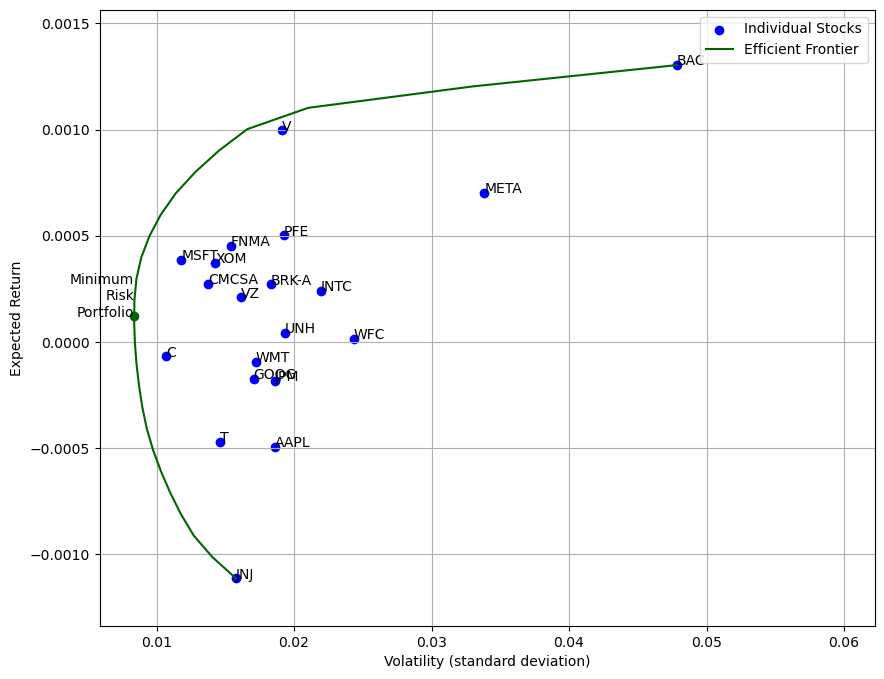

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()



### Best Practices

![BestPractices](https://github.com/guilhermecadori/imagesRepo/blob/main/17.png?raw=true)


## End